In [619]:
#upload packages


import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
from datetime import datetime
excel_data = pd.read_excel('sample.xlsx', sheet_name=None)

for sheet_name, df in excel_data.items():
    if sheet_name == 'Data':
        data = df
    if sheet_name == 'WeightandBenchmarks':
        weight_benchmarks = df
    if sheet_name == 'Names_Ref':
        names_ref = df



In [625]:
#date structure
timestamp1 = str (data ['Event Start Date'].values [0])
timestamp1 =timestamp1 [:10]

timestamp2 = str (data ['Event End Date'].values [0])
timestamp2 =timestamp2 [:10]


date_range = timestamp1+ ':' + timestamp2



2024-01-01:2024-01-04


In [607]:
#makes a dictionary with all the KPIs

values = {'KPI ID':[],
         'Values':[],
         'Benchmark':[],
         'Weight':[],
         'Index':[],
         'Input':[]}

for x in data.columns:
    if 'KPI' in x:
        values['KPI ID'].append (x)
        id_val = data[x].values[0]
        values ['Values'].append (id_val)


print (values)

{'KPI ID': ['KPI_1', 'KPI_2', 'KPI_3', 'KPI_4', 'KPI_5', 'KPI_6', 'KPI_7', 'KPI_9', 'KPI_10'], 'Values': [80, 0, 777, 1000000, 32, 34235, 34, 55, 66662], 'Benchmark': [], 'Weight': [], 'Index': [], 'Input': []}


In [524]:
rox_output = 0

for key in values['KPI ID']:
    #put the benchmark in-------------------------
    benchmark = weight_benchmarks.loc[weight_benchmarks['KPI ID'] == key, 'Benchmark']
    benchmark = benchmark.values[0]
    values['Benchmark'].append (benchmark)
    
    #put the weight in-----------------------------
    weight = weight_benchmarks.loc[weight_benchmarks['KPI ID'] == key, 'Weight']
    weight = weight.values[0]
    values['Weight'].append (weight)

    
    #calculate the index---------------------------

    #find the KPI ID index so can index values

    ind = values['KPI ID'].index (key)
    
    index = (1+ ((values['Values'][ind] - benchmark)/benchmark)) * 100
    values['Index'].append (round (index,2))

    #calculate the rox input---------------------------

    input = round (index * weight)
    values['Input'].append (input)
    rox_output+=input
    
    
    
print (values)
    
rox_output = round (rox_output)

{'KPI ID': ['KPI_1', 'KPI_2', 'KPI_3', 'KPI_4', 'KPI_5', 'KPI_6', 'KPI_7', 'KPI_9', 'KPI_10'], 'Values': [80, 0, 777, 1000000, 32, 34235, 34, 55, 66662], 'Benchmark': [70, 100, 800, 1000000, 50, 30000, 20, 100, 100000], 'Weight': [0.2, 0.01, 0.09, 0.1, 0.05, 0.1, 0.15, 0.1, 0.2], 'Index': [114.29, 0.0, 97.12, 100.0, 64.0, 114.12, 170.0, 55.0, 66.66], 'Input': [23, 0, 9, 10, 3, 11, 26, 6, 13]}


In [525]:
#turn to dataframe

df = pd.DataFrame (values)

In [526]:
df.head(10)

,KPI ID,Values,Benchmark,Weight,Index,Input
0,KPI_1,80,70,0.20,114.29,23
1,KPI_2,0,100,0.01,0.00,0
2,KPI_3,777,800,0.09,97.12,9
3,KPI_4,1000000,1000000,0.10,100.00,10
4,KPI_5,32,50,0.05,64.00,3
5,KPI_6,34235,30000,0.10,114.12,11
6,KPI_7,34,20,0.15,170.00,26
7,KPI_9,55,100,0.10,55.00,6
8,KPI_10,66662,100000,0.20,66.66,13


In [527]:

include_col = ['KPI ID','KPI Name', 'Bucket','Bucket Name']

names_ref = names_ref [include_col]


df = pd.merge (df, names_ref, on = 'KPI ID', how = 'left')

df.head(10)


,KPI ID,Values,Benchmark,Weight,Index,Input,KPI Name,Bucket,Bucket Name
0,KPI_1,80,70,0.20,114.29,23,NPS,Bucket 1,Brand
1,KPI_2,0,100,0.01,0.00,0,Favorability,Bucket 1,Brand
2,KPI_3,777,800,0.09,97.12,9,Impressions,Bucket 3,Experience
3,KPI_4,1000000,1000000,0.10,100.00,10,Engagements,Bucket 2,Scale
4,KPI_5,32,50,0.05,64.00,3,Conversions,Bucket 4,Efficiency
5,KPI_6,34235,30000,0.10,114.12,11,Registration,Bucket 4,Efficiency
6,KPI_7,34,20,0.15,170.00,26,LQA,Bucket 2,Scale
7,KPI_9,55,100,0.10,55.00,6,Sales On Site,Bucket 3,Experience
8,KPI_10,66662,100000,0.20,66.66,13,Consideration,Bucket 1,Brand


In [528]:
sorted_df = df.sort_values (by = 'Bucket', ascending = True)
sorted_df.head (10)

,KPI ID,Values,Benchmark,Weight,Index,Input,KPI Name,Bucket,Bucket Name
0,KPI_1,80,70,0.20,114.29,23,NPS,Bucket 1,Brand
1,KPI_2,0,100,0.01,0.00,0,Favorability,Bucket 1,Brand
8,KPI_10,66662,100000,0.20,66.66,13,Consideration,Bucket 1,Brand
3,KPI_4,1000000,1000000,0.10,100.00,10,Engagements,Bucket 2,Scale
6,KPI_7,34,20,0.15,170.00,26,LQA,Bucket 2,Scale
2,KPI_3,777,800,0.09,97.12,9,Impressions,Bucket 3,Experience
7,KPI_9,55,100,0.10,55.00,6,Sales On Site,Bucket 3,Experience
4,KPI_5,32,50,0.05,64.00,3,Conversions,Bucket 4,Efficiency
5,KPI_6,34235,30000,0.10,114.12,11,Registration,Bucket 4,Efficiency


In [541]:

#put all the column values into a list
KPI_name = sorted_df ['KPI Name'].values 
Weights = sorted_df ['Weight'].values
KPI_comb = []
Input = sorted_df ['Input'].values
for i in range (len (Weights)):
    KPI_comb.append (f'<b> {KPI_name[i]}</b>' + ' (' + str (Weights[i] * 100) + '%' + ')')

Buckets = sorted_df ['Bucket Name'].values
print (Buckets)
Values = sorted_df ['Values'].values
Benchmark = sorted_df ['Benchmark'].values
Index = sorted_df ['Index'].values
                                                            

['Brand' 'Brand' 'Brand' 'Scale' 'Scale' 'Experience' 'Experience'
 'Efficiency' 'Efficiency']


In [600]:
colors = []
text_color = []
for i, row in sorted_df.iterrows ():
    bucketNum = row['Bucket'].split () [1]
    if int (bucketNum) % 2 != 0:
        #if odd number then white
        colors.append ('white')
    else:
        colors.append ('#E1EEF2')

    if row ['Index'] > 120:
        text_color.append ('green')
    elif row['Index'] <=80:
        text_color.append ('red')
    else:
        text_color.append ('black')

colors_text = [
    ['black', 'black', 'black', 'black','black', 'black', 'black', 'black','black'],
    ['black', 'black', 'black', 'black','black', 'black', 'black', 'black','black'],
    ['black', 'black', 'black', 'black','black', 'black', 'black', 'black','black']
]
colors_text = colors_text + [text_color]
                        

In [601]:

fig = go.Figure(data=[go.Table(
    header=dict(values=['<b>KPI(Weight)</b>', 
                        '<b>Result</b>', 
                        '<b>Benchmark</b>',
                        '<b>Index</b>'],
               line=dict(width=0),
               font=dict(color='white', size = 13),
                fill_color = 'black'
               ),
    cells=dict(values=[KPI_comb, Values, Benchmark, Index],
               align=['left', 'center', 'center', 'center'], 
              font=dict(color=colors_text),
              fill = dict (color = [colors]),
              line=dict(width=0)
              )
    
)])

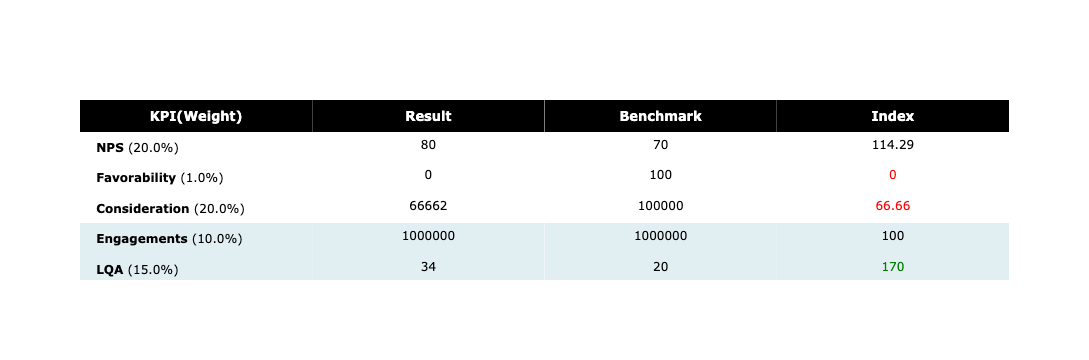

In [602]:

fig.show()

### 2nd Viz

In [694]:
#customize colors


if rox_output > 120: 
    text_color_rox = 'green'
    dot = 'green'

elif rox_output < 80: 
    text_color_rox = 'red'
    dot = 'red'
else: 
     text_color_rox = 'yellow'
     dot = 'purple'

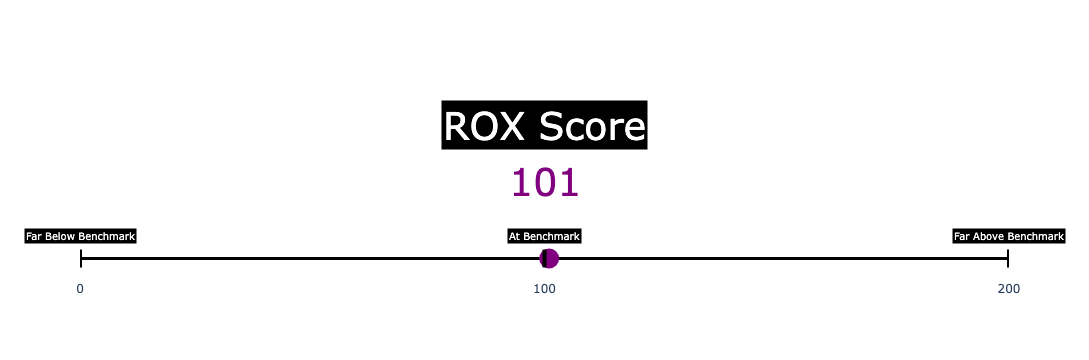

In [534]:

fig2 = go.Figure()
fig2.add_trace(go.Scatter(
    x=[rox_output], y=[0,0], mode='markers', marker_size=20,
    marker=dict(size=20, color = dot)  
))

# Add a vertical line at x=0
fig2.add_trace(go.Scatter(
    x=[0,0],
    y=[-.4, .4],  # Span from the minimum to maximum y-value
    mode='lines',
    line=dict(color='black', width=4)  # Adjust line color, width, and dash style
))

# Add a vertical line at x=100
fig2.add_trace(go.Scatter(
    x=[100,100],
    y=[-.4, .4],  # Span from the minimum to maximum y-value
    mode='lines',
    line=dict(color='black', width=4)  # Adjust line color, width, and dash style
))

# Add a vertical line at x=200
fig2.add_trace(go.Scatter(
    x=[200,200],
    y=[-.4, .4],  # Span from the minimum to maximum y-value
    mode='lines',
    line=dict(color='black', width=4)  # Adjust line color, width, and dash style
))

# Add number annotations
fig2.add_annotation(
    x=100, y=3.5,  # Coordinates of the annotation
    text=rox_output,# Text of the annotation
    showarrow=False,  # Remove the arrow
    font=dict(size=38, color = text_color_rox)
)

# Add text annotations
fig2.add_annotation(
    x=100, y=6,  # Coordinates of the annotation
    text='ROX Score',  # Text of the annotation
    showarrow=False,  # Remove the arrow
    font=dict(size=38, color = 'white'),
    bgcolor='black',
)

# Add text annotations
fig2.add_annotation(
    x=0, y=1,  # Coordinates of the annotation
    text='Far Below Benchmark',  # Text of the annotation
    showarrow=False,  # Remove the arrow
    font=dict(size=10, color = 'white'),
    bgcolor='black',
)

# Add text annotations
fig2.add_annotation(
    x=100, y=1,  # Coordinates of the annotation
    text='At Benchmark',  # Text of the annotation
    showarrow=False,  # Remove the arrow
    font=dict(size=10, color = 'white'),
    bgcolor='black',
)

# Add text annotations
fig2.add_annotation(
    x=200, y=1,  # Coordinates of the annotation
    text='Far Above Benchmark',  # Text of the annotation
    showarrow=False,  # Remove the arrow
    font=dict(size=10, color = 'white'),
    bgcolor='black',
)

fig2.update_xaxes(showgrid=False, 
                  dtick=100,
                 range = [0,200])
fig2.update_yaxes(showgrid=False, 
                 zeroline=True, zerolinecolor='black', zerolinewidth=3,
                 showticklabels=False)
fig2.update_layout(height=200, plot_bgcolor='white',showlegend=False)
fig2.show()

In [535]:
#modify brand name so that any duplicates would have a blank space

start = ''
Buckets_3 = []
print (Buckets)

for i in range (len (Buckets)):
    if Buckets[i] is not start:
        Buckets_3.append (f'<b> {Buckets[i]}</b>')
        start = Buckets[i]
    else:
        Buckets_3.append(' ')

print (Buckets_3)

['Brand' 'Brand' 'Brand' 'Scale' 'Scale' 'Experience' 'Experience'
 'Efficiency' 'Efficiency']
['<b> Brand</b>', ' ', ' ', '<b> Scale</b>', ' ', '<b> Experience</b>', ' ', '<b> Efficiency</b>', ' ']


In [536]:
#add colors

colors_text.append (['black', 'black', 'black', 'black','black', 'black', 'black', 'black','black'])
colors_text.append (['black', 'black', 'black', 'black','black', 'black', 'black', 'black','black'])

In [537]:
#bold the KPI values

for i in range (len (Weights)):
    KPI_name [i] = f'<b> {KPI_name[i]}</b>'

#change font sizes

cell_font_size = [16, 12, 12, 12, 12, 12]  


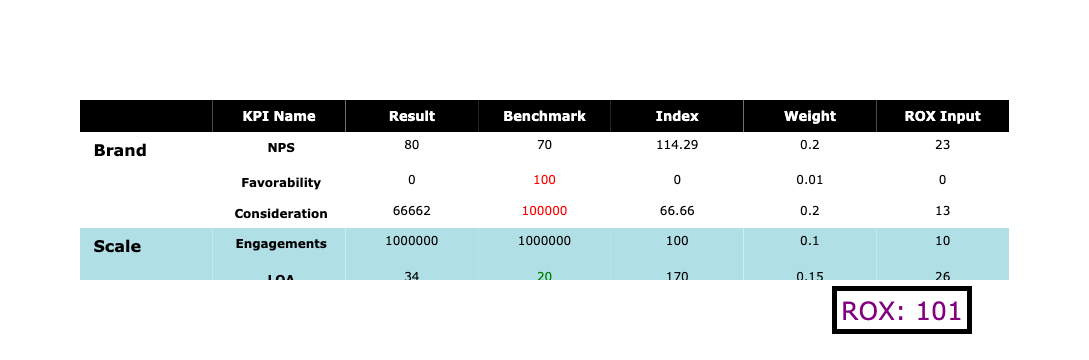

In [538]:
fig3 = go.Figure(data=[go.Table(
    header=dict(values=['',
                        '<b>KPI Name</b>', 
                        '<b>Result</b>', 
                        '<b>Benchmark</b>',
                        '<b>Index</b>',
                        '<b>Weight</b>',
                        '<b>ROX Input</b>'
                       ],
               line=dict(width=0),
               font=dict(color='white', size = 13),
                fill_color = 'black'
               ),
    cells=dict(values=[Buckets_3,KPI_name, Values, Benchmark, Index, Weights, Input],
               align=['left', 'center', 'center', 'center'], 
              font=dict(color=colors_text, size = cell_font_size),
              fill = dict (color = [colors]),
              line=dict(width=0)
              )
    
)])

# Add annotation outside the table
fig3.add_annotation(
    xref='paper', yref='paper',
    x=.96, y=-.3,  # Coordinates relative to the entire plot
    text='ROX: ' + str (rox_output),
    showarrow=False,
    font=dict(size=25, color=text_color_rox),
    borderpad=4,  # Padding around the annotation box
    borderwidth=5,  # Border width
    bordercolor='black'  # Border color

)

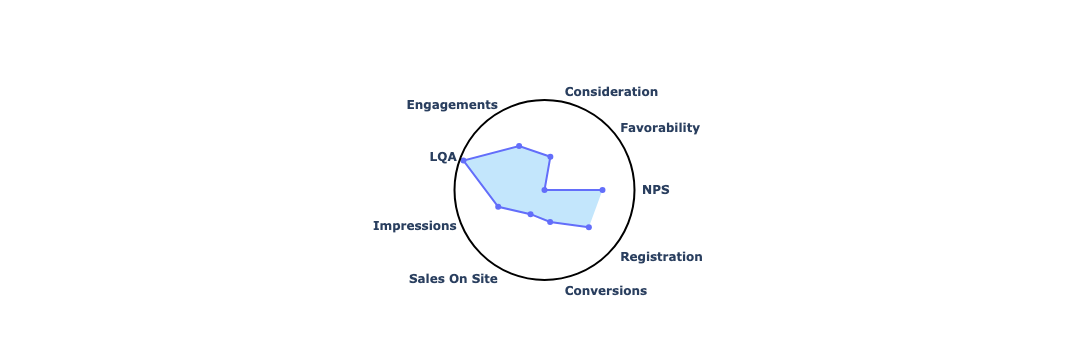

In [576]:

fig4 = go.Figure()

fig4.add_trace(go.Scatterpolar(
      r=Index,
      theta=KPI_name,
      fill='toself',
      fillcolor='rgba(135, 206, 250, 0.5)',
      mode='lines+markers'  # Include markers
))

# Update the layout of the figure
fig4.update_layout(
    polar=dict(
        bgcolor='white',
        radialaxis=dict(
            visible=False  # Hide the radial axis (y-axis)
        ),
        angularaxis=dict(
            visible=True,  # Hide the angular axis (x-axis)
            linecolor='black',  # Set line color
            linewidth=2,
        )
    )
    ,showlegend=False  # Do not display a legend
)

/opt/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



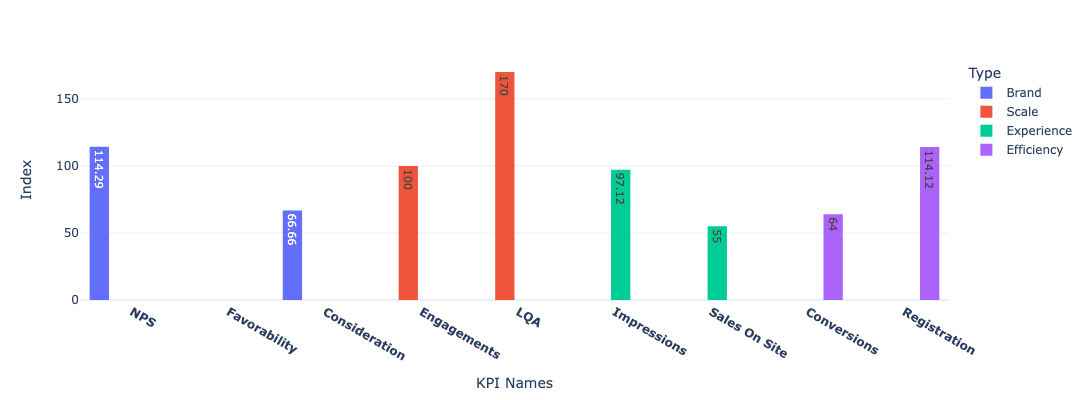

In [593]:

pio.templates.default = "plotly_white"
# Assuming sorted_df contains your data and variables are defined (KPI_name, Index, Buckets)
fig = px.histogram(sorted_df, x=KPI_name, y=Index,
                   color=Buckets, barmode='group',
                   height=400, text_auto=True)
fig.update_layout(xaxis_title="KPI Names",
                  yaxis_title="Index",
                  legend_title_text="Type")

fig.show()

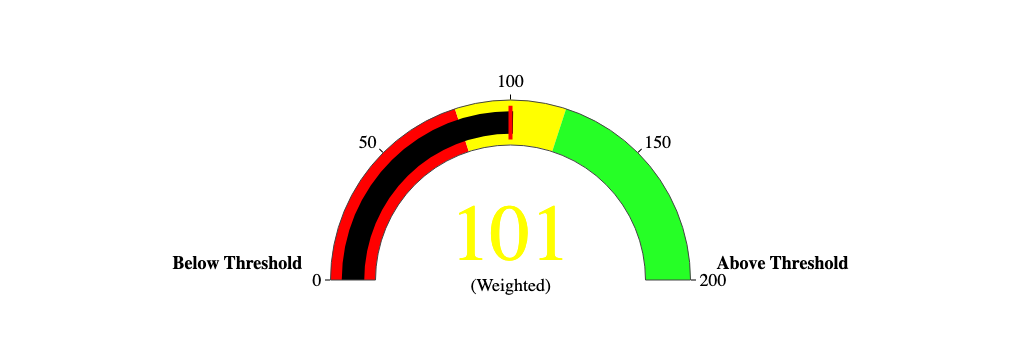

In [703]:

fig4_textcolor = 'black'
fig4 = go.Figure(go.Indicator(
    mode="gauge+number",
    value=rox_output,
    number = {'font': {'color': text_color_rox}}, 
    domain={'x': [0, 1], 'y': [0, 1]},
    #title={'text': "ROX Score"},
    gauge={
        'axis': {'range': [0, 200], 'tickwidth': 1, 'tickcolor': "black"},
        'bar': {'color': "black"},
        'steps': [
            {'range': [0, 80], 'color': 'red'},
            {'range': [80, 120], 'color': 'yellow'},
            {'range': [120, 200], 'color': '#26ff26'}
        ],
        'threshold': {'line': {'color': "red", 'width': 4}, 'thickness': 0.75, 'value': 100}
    }
))

fig4.add_annotation (
    x = 0.5,
    y = -.1, 
    text = '<br> (Weighted) </br>',
    showarrow = False
)

fig4.add_annotation (
    x = .9,
    y = .025, 
    text = '<b> Above Threshold </b>',
    showarrow = False
)

fig4.add_annotation (
    x = 0.10,
    y = .025, 
    text = '<b> Below Threshold </b>',
    showarrow = False
)

fig4.update_layout (font=dict(family="sans serif",size=18,color=fig4_textcolor ))


fig4.show()